In [1]:
! pip install -U langchain-community -q
! pip install unstructured -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.8/195.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.2/304.2 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 8.8 MB/s eta 0:00:00


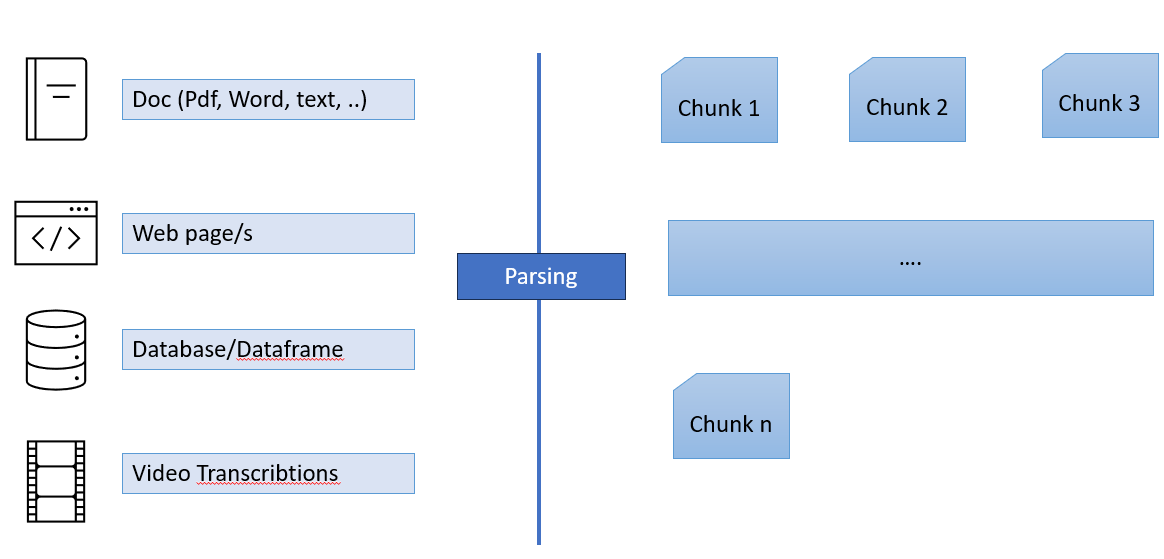

In [2]:
import langchain
from langchain.document_loaders import PyPDFLoader
import pandas as pd
import numpy as np

In [3]:
!wget -O youtube-sub.csv https://raw.githubusercontent.com/Petlja/JupyterBookSrCyr/master/podaci/Top%2025%20YouTubers.csv

--2025-06-05 14:17:00--  https://raw.githubusercontent.com/Petlja/JupyterBookSrCyr/master/podaci/Top%2025%20YouTubers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1153 (1.1K) [text/plain]
Saving to: ‘youtube-sub.csv’

youtube-sub.csv     100%[===================>]   1.13K  --.-KB/s    in 0s      

2025-06-05 14:17:00 (65.0 MB/s) - ‘youtube-sub.csv’ saved [1153/1153]



In [4]:
data = pd.read_csv('youtube-sub.csv')

In [5]:
data.head()

,RANK,GRADE,NAME,VIDEOS,SUBSCRIBERS,VIEWES
0,1,A++,T-Series,13629,105783888,76945588449
1,2,A,PewDiePie,3898,97853589,22298927681
2,3,A+,5-Minute Crafts,3341,58629572,14860695079
3,4,A++,Cocomelon - Nursery Rhymes,441,53163816,33519273951
4,5,A++,SET India,31923,51784081,36464793233


In [7]:
from langchain.document_loaders import CSVLoader

In [8]:
loader = CSVLoader(file_path='youtube-sub.csv').load()

In [9]:
len(loader)

25

In [10]:
loader[2].metadata

{'source': 'youtube-sub.csv', 'row': 2}

In [11]:
loader[2].page_content

'\ufeffRANK: 3\nGRADE: A+\nNAME: 5-Minute Crafts\nVIDEOS: 3341\nSUBSCRIBERS: 58629572\nVIEWES: 14860695079'

In [12]:
print(loader[2].dict())

{'id': None, 'metadata': {'source': 'youtube-sub.csv', 'row': 2}, 'page_content': '\ufeffRANK: 3\nGRADE: A+\nNAME: 5-Minute Crafts\nVIDEOS: 3341\nSUBSCRIBERS: 58629572\nVIEWES: 14860695079', 'type': 'Document'}


<ipython-input-12-74ecb1cc4714>:1: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  print(loader[2].dict())


# Loaders | URLs

In [13]:
from langchain.document_loaders import UnstructuredURLLoader

In [14]:
urls = [
    "https://www.apple.com/in/support/products/faqs.html",
    "https://www.apple.com/legal/sales-support/",
]

In [15]:
llm_loader = UnstructuredURLLoader(urls=urls)
llm_data = llm_loader.load()

In [16]:
len(llm_data)

2

In [17]:
llm_data[1]

Document(metadata={'source': 'https://www.apple.com/legal/sales-support/'}, page_content='Sales & Support\n\nGet familiar with the policies, terms, and conditions for the purchase, support, and servicing of your Apple products.\n\nAppleCare+ with Theft and Loss\n\nAppleCare+ with Theft and Loss provides everything included in AppleCare+ and up to two incidents of theft or loss coverage every 12 months.\n\nView the Theft and Loss Insurance Documents\n\nAppleCare+\n\nAppleCare+ provides additional hardware service and technical support from Apple, including coverage for unlimited incidents of accidental damage per device covered.\n\nExplore the AppleCare+ Terms and Conditions\n\nAppleCare Plans\n\nSome services and repairs are covered under AppleCare plans. Check the terms and conditions of specific plans to verify which support services may be included with your Apple products.\n\nAppleCare Protection Plan for Macs, iPods, Apple TV\n\nAppleCare Protection Plan for iPhone\n\nAppleCare Pr

# Loaders | WikiPedia

In [18]:
!pip install -q wikipedia

  Preparing metadata (setup.py) ... done


In [19]:

from langchain.document_loaders import WikipediaLoader


In [20]:
llm_loader = WikipediaLoader(query="Machine Learning", lang="en", load_max_docs=5)
llm_data = llm_loader.load()

In [21]:
len(llm_data)

5

In [22]:
llm_data[0].metadata

{'title': 'Machine learning',
 'summary': 'Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.\nML finds application in many fields, including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine. The application of ML to business problems is known as predictive analytics.\nStatistics and mathematical optimisation (mathematical programming) methods comprise the foundations of machine learning. Data mining is a related field of study, focusing on exploratory data analysis (EDA) via unsupervised learning. \nFrom a theoretical vie

In [23]:
llm_data[0].page_content

'Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.\nML finds application in many fields, including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine. The application of ML to business problems is known as predictive analytics.\nStatistics and mathematical optimisation (mathematical programming) methods comprise the foundations of machine learning. Data mining is a related field of study, focusing on exploratory data analysis (EDA) via unsupervised learning. \nFrom a theoretical viewpoint, probably approximately correct lea

In [24]:
!wget -O lard.pdf  https://laraveldaily.com/wp-content/uploads/2020/04/laravel-tips-2020-04.pdf

--2025-06-05 14:18:20--  https://laraveldaily.com/wp-content/uploads/2020/04/laravel-tips-2020-04.pdf
Resolving laraveldaily.com (laraveldaily.com)... 104.21.86.73, 172.67.216.144, 2606:4700:3033::ac43:d890, ...
Connecting to laraveldaily.com (laraveldaily.com)|104.21.86.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314570 (307K) [application/pdf]
Saving to: ‘lard.pdf’

lard.pdf            100%[===================>] 307.20K  --.-KB/s    in 0.1s    

2025-06-05 14:18:20 (2.90 MB/s) - ‘lard.pdf’ saved [314570/314570]



In [25]:
from langchain.document_loaders import PyPDFLoader

In [26]:
llm_chat = PyPDFLoader("/content/lard.pdf")

In [27]:
llm_data = llm_chat.load()

In [28]:
len(llm_data)

41

In [29]:
llm_data[0]

Document(metadata={'producer': 'Skia/PDF m84', 'creator': 'PyPDF', 'creationdate': '', 'source': '/content/lard.pdf', 'total_pages': 41, 'page': 0, 'page_label': '1'}, page_content='100 (and counting)\n \nLaravel Quick Tips\n \n \n \nPrepared by:\n \nPovilas Korop / LaravelDaily Team\n \nwww.laraveldaily.com\n \n \npovilas@laraveldaily.com\n \n \nLast updated:\n \n \nApril 2020\n \n \n \n \n \n \n \nSupport our work by checking our Laravel adminpanel generator: \n\u200b \nwww.quickadminpanel.com')

In [32]:
llm_data[0].metadata

{'producer': 'Skia/PDF m84',
 'creator': 'PyPDF',
 'creationdate': '',
 'source': '/content/lard.pdf',
 'total_pages': 41,
 'page': 0,
 'page_label': '1'}

In [31]:
print(llm_data[2].page_content)

Schema::create('employees', function (Blueprint $table) {
 
    $table->
​ 
unsignedInteger
​ 
('company_id');
 
    $table->foreign('company_id')->references('id')->on('companies');
 
    // ...
 
});
 
 
You can also use 
​ 
unsignedBigInteger()
​ 
 if that other column is 
​ 
bigInteger()
​ 
 type.
 
 
Schema::create('employees', function (Blueprint $table) {
 
    $table->
​ 
unsignedBigInteger
​ 
('company_id');
 
});
 
 
 
 
Tip 3. OrderBy on Eloquent relationships
 
 
You can specify 
​ 
orderBy()
​ 
 directly on your Eloquent relationships.
 
 
public function products()
 
{
 
    return $this->hasMany(Product::class);
 
}
 
 
public function productsByName()
 
{
 
    return $this->hasMany(Product::class)->orderBy('name');
 
}
 
 
 
 
Tip 4. Order of Migrations
 
 
If you want to change the order of DB migrations, just rename the file's timestamp, like from
 
2018_08_04_070443_create_posts_table.php
​ 
 to
 
2018_07_04_070443_create_posts_table.php
​ 
 (changed from 
​ 
2018_0

In [33]:
pip install pymupdf -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 41.6 MB/s eta 0:00:00


In [35]:
from langchain_community.document_loaders import PyMuPDFLoader

loader = PyMuPDFLoader("https://laraveldaily.com/wp-content/uploads/2020/04/laravel-tips-2020-04.pdf")
documents = loader.load()


In [36]:
documents[0]

Document(metadata={'producer': 'Skia/PDF m84', 'creator': '', 'creationdate': '', 'source': 'https://laraveldaily.com/wp-content/uploads/2020/04/laravel-tips-2020-04.pdf', 'file_path': 'https://laraveldaily.com/wp-content/uploads/2020/04/laravel-tips-2020-04.pdf', 'total_pages': 41, 'format': 'PDF 1.5', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '', 'trapped': '', 'modDate': '', 'creationDate': '', 'page': 0}, page_content='100 (and counting) \nLaravel Quick Tips \n \n \nPrepared by: \nPovilas Korop / LaravelDaily Team \nwww.laraveldaily.com  \npovilas@laraveldaily.com  \nLast updated:  \nApril 2020 \n \n \n \n \n \n \nSupport our work by checking our Laravel adminpanel generator: \u200bwww.quickadminpanel.com')

In [39]:
len(documents)

41

In [37]:
documents[0]

Document(metadata={'producer': 'Skia/PDF m84', 'creator': '', 'creationdate': '', 'source': 'https://laraveldaily.com/wp-content/uploads/2020/04/laravel-tips-2020-04.pdf', 'file_path': 'https://laraveldaily.com/wp-content/uploads/2020/04/laravel-tips-2020-04.pdf', 'total_pages': 41, 'format': 'PDF 1.5', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '', 'trapped': '', 'modDate': '', 'creationDate': '', 'page': 0}, page_content='100 (and counting) \nLaravel Quick Tips \n \n \nPrepared by: \nPovilas Korop / LaravelDaily Team \nwww.laraveldaily.com  \npovilas@laraveldaily.com  \nLast updated:  \nApril 2020 \n \n \n \n \n \n \nSupport our work by checking our Laravel adminpanel generator: \u200bwww.quickadminpanel.com')

In [38]:
documents[0].metadata

{'producer': 'Skia/PDF m84',
 'creator': '',
 'creationdate': '',
 'source': 'https://laraveldaily.com/wp-content/uploads/2020/04/laravel-tips-2020-04.pdf',
 'file_path': 'https://laraveldaily.com/wp-content/uploads/2020/04/laravel-tips-2020-04.pdf',
 'total_pages': 41,
 'format': 'PDF 1.5',
 'title': '',
 'author': '',
 'subject': '',
 'keywords': '',
 'moddate': '',
 'trapped': '',
 'modDate': '',
 'creationDate': '',
 'page': 0}

# Loaders | Directories

In [40]:
from langchain.document_loaders import DirectoryLoader

In [41]:
# llm_chat = DirectoryLoader(
#    "folder_name",
#    glob="*.txt",
#    show_progress=True)

In [42]:
# llm_data = llm_chat.load()

In [43]:
# llm_data

In [44]:
from langchain.document_loaders import PyPDFDirectoryLoader

llm_loader = PyPDFDirectoryLoader("/content/lard.pdf")

llm_data = llm_loader.load()

In [45]:
len(llm_data)

0

# Text Splitter

In [46]:
from langchain.document_loaders import WikipediaLoader

In [47]:

query_1 = "Naguib Sawiris"
query_2 = "Thomas Edison"

In [48]:
docs_1 = WikipediaLoader(query=query_1,load_max_docs=1,doc_content_chars_max=1000).load()
docs_2 = WikipediaLoader(query=query_2,load_max_docs=1,doc_content_chars_max=1000).load()

In [49]:
len(docs_1)

1

In [50]:
len(docs_2)

1

In [51]:
print(docs_1[0].page_content)

Naguib Onsi Sawiris (Arabic: نجيب انسى ساويرس [næˈɡiːb ˈʔonsi sæˈwiːɾɪs]; Coptic: Ⲛⲉⲅⲓⲃ Ⲟⲛⲥⲓ Ⲥⲉⲩⲏⲣⲟⲥ [sæˈwɪɾos]; born 15 June 1954) is an Egyptian businessman. Sawiris is chairman of Weather Investments's parent company, and the former chairman and CEO of Orascom Telecom Holding and Orascom Investment Holding S.A.E.


== Early life ==
Born on 15 June 1954, in Cairo, Egypt, to businessman Onsi Sawiris (founder of Orascom Group) and Yousriya Loza Sawiris, Naguib is the eldest of three brothers. His brothers, Nassef and Samih, are also billionaires. 


== Education ==
Naguib received a diploma from the German Evangelical School in Giza, as well as a diploma of mechanical engineering with a master's degree in technical administration from ETH Zurich.


== Career ==
Since joining Orascom, the family business in 1979, Sawiris has contributed to the growth and diversification of the company into what it is today one of Egypt's largest and most diversified conglomerates and the country's large

In [52]:
text_document_1 = docs_1[0].page_content
text_document_2 = docs_2[0].page_content

In [53]:
documents = [text_document_1,text_document_2]

In [54]:
len(documents)

2

In [55]:
metadata = [{"document1":query_1}, {"document2":query_2} ]

In [57]:
from langchain.text_splitter import CharacterTextSplitter

In [58]:
splitetr = CharacterTextSplitter(separator=" ",
                                 chunk_size =100,
                                 chunk_overlap = 30,
                                 length_function = len)

normal_chunks = splitetr.create_documents(documents,metadata)

In [59]:
normal_chunks[0].page_content

'Naguib Onsi Sawiris (Arabic: نجيب انسى ساويرس [næˈɡiːb ˈʔonsi sæˈwiːɾɪs]; Coptic: Ⲛⲉⲅⲓⲃ Ⲟⲛⲥⲓ Ⲥⲉⲩⲏⲣⲟⲥ'

In [60]:
len(normal_chunks)

28

In [61]:
normal_chunks[0].metadata

{'document1': 'Naguib Sawiris'}

In [62]:
normal_chunks[27].metadata

{'document2': 'Thomas Edison'}

# NLTK

In [63]:
from langchain.text_splitter import NLTKTextSplitter

In [64]:
text_splitter = NLTKTextSplitter(chunk_size=100, chunk_overlap=0)

In [65]:
nltk_chunks = text_splitter.create_documents(documents,metadata)

In [66]:
len(nltk_chunks)

14

In [67]:
nltk_chunks[0].page_content

'Naguib Onsi Sawiris (Arabic: نجيب انسى ساويرس [næˈɡiːb ˈʔonsi sæˈwiːɾɪs]; Coptic: Ⲛⲉⲅⲓⲃ Ⲟⲛⲥⲓ Ⲥⲉⲩⲏⲣⲟⲥ [sæˈwɪɾos]; born 15 June 1954) is an Egyptian businessman.'

# Tokens | Transformers Tokens

In [68]:
from transformers import AutoTokenizer
from langchain.text_splitter import CharacterTextSplitter

In [69]:
model_id = "stabilityai/stablelm-tuned-alpha-3b"

In [70]:
tokenizer = AutoTokenizer.from_pretrained(model_id)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/264 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

In [71]:
text_splitter = CharacterTextSplitter.from_huggingface_tokenizer(tokenizer,
                                                                 chunk_size=400,
    chunk_overlap=0
)

In [72]:
tokens_chunks = text_splitter.create_documents(
    documents,metadata
)

In [73]:
len(tokens_chunks)

2

In [74]:
tokens_chunks[0].page_content

"Naguib Onsi Sawiris (Arabic: نجيب انسى ساويرس [næˈɡiːb ˈʔonsi sæˈwiːɾɪs]; Coptic: Ⲛⲉⲅⲓⲃ Ⲟⲛⲥⲓ Ⲥⲉⲩⲏⲣⲟⲥ [sæˈwɪɾos]; born 15 June 1954) is an Egyptian businessman. Sawiris is chairman of Weather Investments's parent company, and the former chairman and CEO of Orascom Telecom Holding and Orascom Investment Holding S.A.E.\n\n\n== Early life ==\nBorn on 15 June 1954, in Cairo, Egypt, to businessman Onsi Sawiris (founder of Orascom Group) and Yousriya Loza Sawiris, Naguib is the eldest of three brothers. His brothers, Nassef and Samih, are also billionaires. \n\n\n== Education ==\nNaguib received a diploma from the German Evangelical School in Giza, as well as a diploma of mechanical engineering with a master's degree in technical administration from ETH Zurich.\n\n\n== Career ==\nSince joining Orascom, the family business in 1979, Sawiris has contributed to the growth and diversification of the company into what it is today one of Egypt's largest and most diversified conglomerates and the co

# Embedding

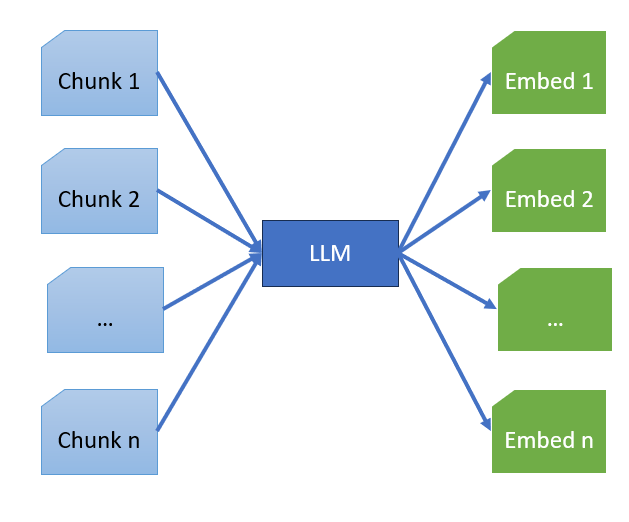

In [75]:
! pip install -qU "langchain[mistralai]" -q

In [77]:
import getpass
import os

if not os.environ.get("MISTRAL_API_KEY"):
  os.environ["MISTRAL_API_KEY"] = getpass.getpass("Enter API key for Mistral AI: ")

from langchain.chat_models import init_chat_model

model = init_chat_model("mistral-large-latest", model_provider="mistralai")

Enter API key for Mistral AI: ··········


In [78]:
model

ChatMistralAI(client=<httpx.Client object at 0x7fa3c54e5190>, async_client=<httpx.AsyncClient object at 0x7fa48be91910>, mistral_api_key=SecretStr('**********'), endpoint='https://api.mistral.ai/v1', model='mistral-large-latest', model_kwargs={})

In [79]:
import getpass
import os

if not os.environ.get("MISTRALAI_API_KEY"):
  os.environ["MISTRALAI_API_KEY"] = getpass.getpass("Enter API key for MistralAI: ")

from langchain_mistralai import MistralAIEmbeddings

embeddings = MistralAIEmbeddings(model="mistral-embed")

Enter API key for MistralAI: ··········


/usr/local/lib/python3.11/dist-packages/langchain_mistralai/embeddings.py:181: UserWarning: Could not download mistral tokenizer from Huggingface for calculating batch sizes. Set a Huggingface token via the HF_TOKEN environment variable to download the real tokenizer. Falling back to a dummy tokenizer that uses `len()`.
  warnings.warn(


In [80]:
from langchain.document_loaders import WikipediaLoader

In [81]:
query_1 = "Nikola Tesla"
query_2 = "Thomas Edison"


docs_1 = WikipediaLoader(query=query_1,load_max_docs=1,
                         doc_content_chars_max=20_000).load()

docs_2 = WikipediaLoader(query=query_2,load_max_docs=1,
                         doc_content_chars_max=20_000).load()

In [83]:
text_document_1= docs_1[0].page_content

In [84]:
text_document_1

'Nikola Tesla (; Serbian Cyrillic: Никола Тесла [nǐkola têsla]; 10 July 1856 – 7 January 1943) was a Serbian-American engineer, futurist, and inventor. He is known for his contributions to the design of the modern alternating current (AC) electricity supply system.\nBorn and raised in the Austrian Empire, Tesla first studied engineering and physics in the 1870s without receiving a degree. He then gained practical experience in the early 1880s working in telephony and at Continental Edison in the new electric power industry. In 1884 he immigrated to the United States, where he became a naturalized citizen. He worked for a short time at the Edison Machine Works in New York City before he struck out on his own. With the help of partners to finance and market his ideas, Tesla set up laboratories and companies in New York to develop a range of electrical and mechanical devices. His AC induction motor and related polyphase AC patents, licensed by Westinghouse Electric in 1888, earned him a c

In [85]:
text_document_2= docs_2[0].page_content

In [86]:
text_document_2

'Thomas Alva Edison (February 11, 1847 – October 18, 1931) was an American inventor and businessman. He developed many devices in fields such as electric power generation, mass communication, sound recording, and motion pictures. These inventions, which include the phonograph, the motion picture camera, and early versions of the electric light bulb, have had a widespread impact on the modern industrialized world. He was one of the first inventors to apply the principles of organized science and teamwork to the process of invention, working with many researchers and employees. He established the first industrial research laboratory.\nEdison was raised in the American Midwest. Early in his career he worked as a telegraph operator, which inspired some of his earliest inventions. In 1876, he established his first laboratory facility in Menlo Park, New Jersey, where many of his early inventions were developed. He later established a botanical laboratory in Fort Myers, Florida, in collaborat

In [94]:
documents = [ text_document_1, text_document_2]
metadatas = [ {"document":query_1}, {"document":query_2} ]

In [95]:
from langchain.text_splitter import NLTKTextSplitter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [96]:
text_splitter = NLTKTextSplitter(chunk_size = 300, chunk_overlap=50)

In [97]:
tokens_chunks = text_splitter.create_documents(documents,metadatas= metadatas)

In [99]:
len(tokens_chunks)

176

In [101]:
tokens_chunks[0].page_content

'Nikola Tesla (; Serbian Cyrillic: Никола Тесла [nǐkola têsla]; 10 July 1856 – 7 January 1943) was a Serbian-American engineer, futurist, and inventor.\n\nHe is known for his contributions to the design of the modern alternating current (AC) electricity supply system.'

In [103]:
tokens_chunks[0].metadata

{'document': 'Nikola Tesla'}

# Embeddings | Mistral

In [106]:
docs_text = [chunk.page_content for chunk in tokens_chunks ]
docs_Embedding = embeddings.embed_documents(docs_text)

In [108]:
docs_Embedding[0]

[-0.035614013671875,
 0.03289794921875,
 0.0228729248046875,
 -0.00421905517578125,
 0.028594970703125,
 0.0205841064453125,
 0.0692138671875,
 -0.01036834716796875,
 -0.00547027587890625,
 -0.03717041015625,
 -0.038604736328125,
 0.040618896484375,
 0.00786590576171875,
 -0.01300811767578125,
 -0.0543212890625,
 0.016082763671875,
 0.018157958984375,
 0.01300811767578125,
 0.037750244140625,
 0.0341796875,
 -0.0109405517578125,
 -0.029449462890625,
 -0.046051025390625,
 -0.006076812744140625,
 0.0021266937255859375,
 -0.027740478515625,
 0.0010900497436523438,
 -0.070068359375,
 -0.050628662109375,
 0.0076141357421875,
 0.021453857421875,
 -0.049468994140625,
 0.0170135498046875,
 0.01666259765625,
 0.0211639404296875,
 -0.0017242431640625,
 0.005504608154296875,
 -0.0592041015625,
 -0.0250244140625,
 0.00897216796875,
 0.0147247314453125,
 0.0233001708984375,
 0.0053253173828125,
 -0.017730712890625,
 0.0090789794921875,
 -0.0013408660888671875,
 0.026885986328125,
 0.015731811523437

In [109]:
# query
query_text = "Can you list a number of Nikola Tesla's inventions?"
query_embedding = embeddings.embed_query(query_text)

# Embeddings | huggingface

In [110]:
%pip install --upgrade --quiet  langchain langchain-huggingface sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 770.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 26.7 MB/s eta 0:00:00


In [111]:
from langchain_huggingface.embeddings import HuggingFaceEmbeddings

In [113]:
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [114]:
docs_Embedding= embeddings.embed_documents(docs_text)

In [115]:
tokens_chunks[5]

Document(metadata={'document': 'Nikola Tesla'}, page_content='Attempting to develop inventions he could patent and market, Tesla conducted a range of experiments with mechanical oscillators/generators, electrical discharge tubes, and early X-ray imaging.\n\nHe also built a wirelessly controlled boat, one of the first ever exhibited.')

In [116]:
query_text = "Can you list a number of Nikola Tesla's inventions?"
query_embedding = embeddings.embed_query(query_text)

# Embeddings | Cohere

In [117]:
import getpass
import os

if not os.getenv("COHERE_API_KEY"):
    os.environ["COHERE_API_KEY"] = getpass.getpass("Enter your Cohere API key: ")

Enter your Cohere API key: ··········


In [118]:
%pip install -qU langchain-cohere

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.0 MB/s eta 0:00:00


In [120]:
from langchain_cohere import CohereEmbeddings

embeddings = CohereEmbeddings(
    model="embed-english-v3.0",
)

In [121]:
docs_Embedding= embeddings.embed_documents(docs_text)

In [122]:
# query
query_text = "What is the name of Nikola Tesla's mother?"
query_embedding = embeddings.embed_query(query_text)

# Vectors Stores

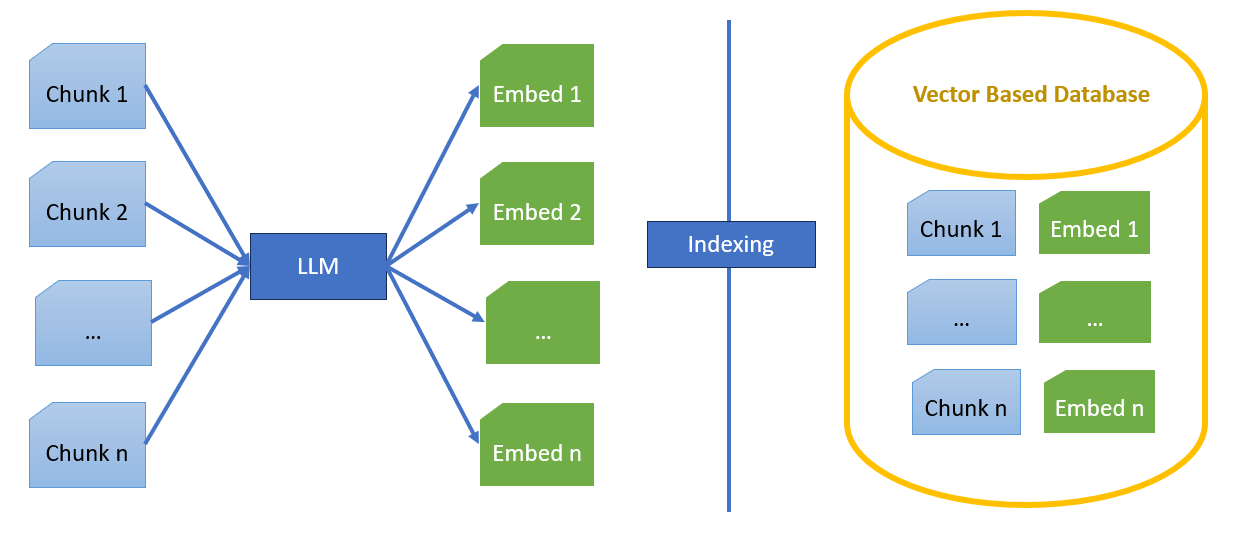

In [123]:
! pip install -qU langchain-chroma -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 9.9 MB/s eta 0:

# faiss

In [124]:
# text_document_1= docs_1[0].page_content
doc = text_document_1

In [125]:
doc

'Nikola Tesla (; Serbian Cyrillic: Никола Тесла [nǐkola têsla]; 10 July 1856 – 7 January 1943) was a Serbian-American engineer, futurist, and inventor. He is known for his contributions to the design of the modern alternating current (AC) electricity supply system.\nBorn and raised in the Austrian Empire, Tesla first studied engineering and physics in the 1870s without receiving a degree. He then gained practical experience in the early 1880s working in telephony and at Continental Edison in the new electric power industry. In 1884 he immigrated to the United States, where he became a naturalized citizen. He worked for a short time at the Edison Machine Works in New York City before he struck out on his own. With the help of partners to finance and market his ideas, Tesla set up laboratories and companies in New York to develop a range of electrical and mechanical devices. His AC induction motor and related polyphase AC patents, licensed by Westinghouse Electric in 1888, earned him a c

In [126]:
text_splitter = NLTKTextSplitter(chunk_size=300, chunk_overlap=50)

tokens_chunks = text_splitter.create_documents(
                                               [doc],
                                               metadatas=[{"document":query_1}]
                                               )

In [128]:
len(tokens_chunks)

89

In [132]:
! pip install faiss-cpu -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 30.9 MB/s eta 0:00:00


In [ ]:
# docs_Embedding= embeddings.embed_documents(docs_text)# query
# query_text = "What is the name of Nikola Tesla's mother?"
# query_embedding = embeddings.embed_query(query_text)

In [129]:
docs_ids = list( range( len(tokens_chunks) ) )

In [130]:
from langchain.vectorstores import FAISS

In [133]:
vector_db = FAISS.from_documents(tokens_chunks,embeddings)

In [134]:
query_text = "In which year did Tesla's fathre die?"
similar_docs = vector_db.similarity_search(query_text)

In [135]:
len(similar_docs)

4

In [137]:
similar_docs[0].page_content

"He died in New York City in January 1943.\n\nTesla's work fell into relative obscurity following his death, until 1960, when the General Conference on Weights and Measures named the International System of Units (SI) measurement of magnetic flux density the tesla in his honor."

In [140]:
from langchain.vectorstores import Chroma

In [146]:
vector_store = Chroma.from_documents(
    tokens_chunks,
    embeddings,
    collection_name="example_collection",
    persist_directory="./chroma_langchain_db",  # Where to save data locally, remove if not necessary
    ids = [str(i) for i in docs_ids]
)

In [150]:
# search for most similar document to a query
query_text = "In which year did Tesla's fathre die?"

similar_docs = vector_db.similarity_search(
                                      query_text,
                                      k=5,
                                      # filter={'document': 'Nikola Tesla'}   # option

                                    )

In [151]:
similar_docs[0].page_content

"He died in New York City in January 1943.\n\nTesla's work fell into relative obscurity following his death, until 1960, when the General Conference on Weights and Measures named the International System of Units (SI) measurement of magnetic flux density the tesla in his honor."

In [152]:
## save to disk
vector_store.persist()


<ipython-input-152-453b3b9f5f95>:2: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vector_store.persist()


In [162]:
## Load from disk
load_from_dir = "/content/chroma_langchain_db"
loaded_vector_db = Chroma(
    persist_directory=load_from_dir,
    embedding_function=embeddings,
)

In [163]:
# search for most similar document to a query
query_text = "In which year did Tesla's fathre die?"

similar_docs = loaded_vector_db.similarity_search(
                                      query_text,
                                      k=5,
                                      filter={'document': 'Nikola Tesla'}
                                    )

In [161]:
len(similar_docs)

0

# QnA Chain

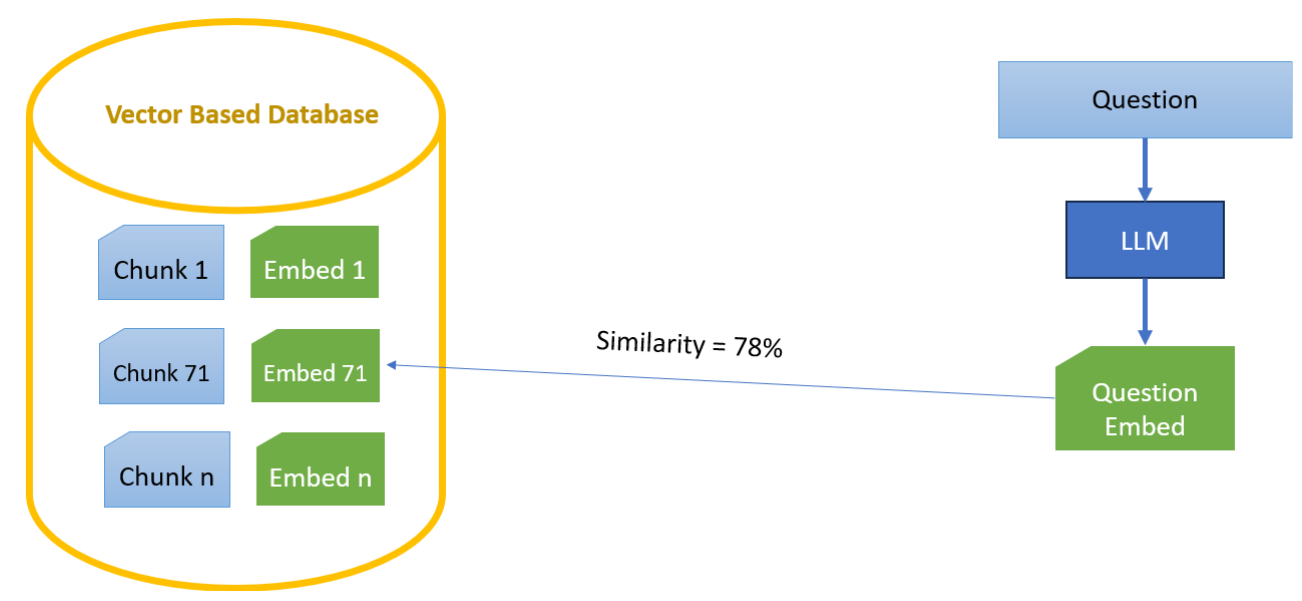

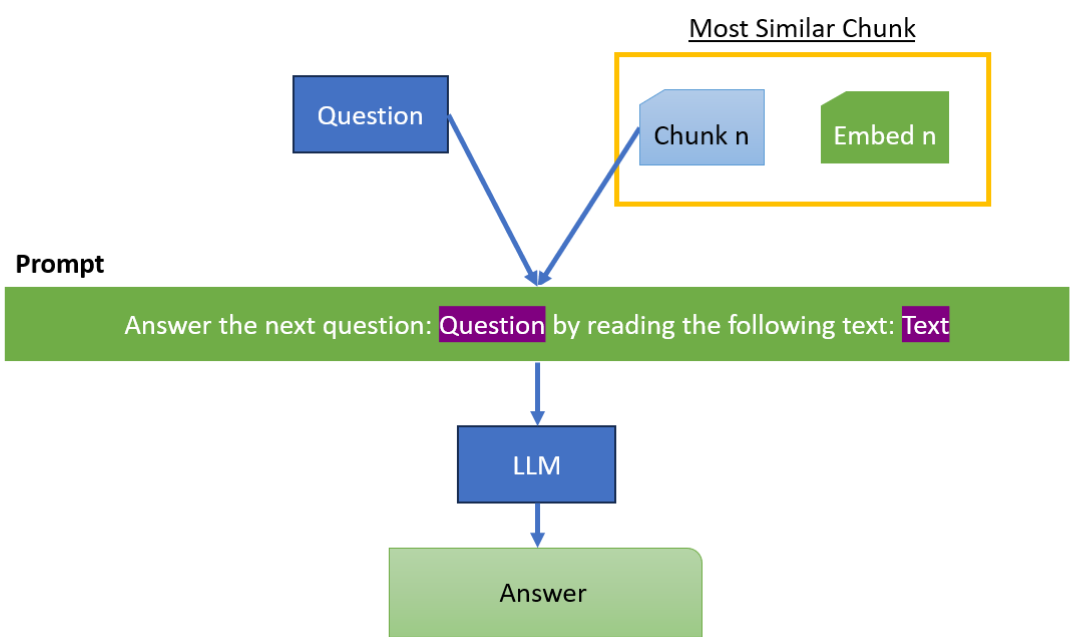

# QnA Chain | Stuff

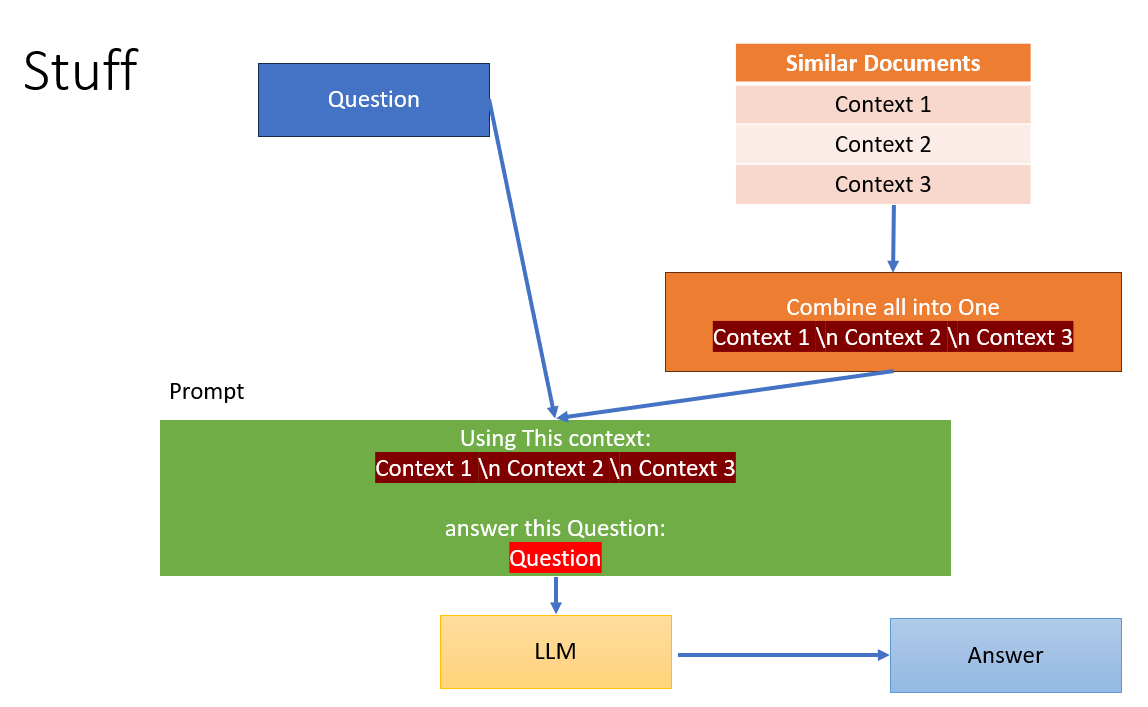

In [165]:
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain


In [167]:
qna_template = "/n".join([
    "Answer the next questionu using the provided context.",
    "If the answer is not contained in the context, say 'NO ANSWER IS AVAILABLE'",
    "###Context:",
    "{context}",
    "",
    "### Question:", # sperator
    "{question}"
    "",
    "### Answer:",
])
qna_prompt= PromptTemplate(
    template= qna_template,
    input_variables = ["context","question"],
    verbose= True
)

In [169]:
stuff_chain = load_qa_chain(model, chain_type="stuff", prompt=qna_prompt)

In [170]:
question = "Why did Tesla work as a football player?"

similar_docs = vector_db.similarity_search(question, k=4)

print(len(similar_docs))

4


In [174]:
answer = stuff_chain(
    {
        "input_documents": similar_docs,
        "question": question
    },
    return_only_outputs=True,
)

answer

{'output_text': 'NO ANSWER IS AVAILABLE'}

In [175]:
answer = stuff_chain(
    {
        "input_documents": similar_docs,
        "question": question
    },
    return_only_outputs=False,
)

answer

{'input_documents': [Document(id='01b8b817-90b4-485f-9b07-97dd6716f95a', metadata={'document': 'Nikola Tesla'}, page_content='== Working at Edison ==\nIn 1882, Tivadar Puskás got Tesla another job in Paris with the Continental Edison Company.\n\nTesla began working in what was then a brand new industry, installing indoor incandescent lighting citywide in large scale electric power utility.'),
  Document(id='f1e2d90d-83af-494b-b115-2e531035874c', metadata={'document': 'Nikola Tesla'}, page_content='Upon arrival, Tesla realized that the company, then under construction, was not functional, so he worked as a draftsman in the Central Telegraph Office instead.\n\nWithin a few months, the Budapest Telephone Exchange became functional, and Tesla was allocated the chief electrician position.'),
  Document(id='f64825c9-3cc5-4dd7-881b-f615735b129c', metadata={'document': 'Nikola Tesla'}, page_content='=== Working at Budapest Telephone Exchange ===\nTesla moved to Budapest, Hungary, in 1881 to wo

In [176]:
answer

{'input_documents': [Document(id='01b8b817-90b4-485f-9b07-97dd6716f95a', metadata={'document': 'Nikola Tesla'}, page_content='== Working at Edison ==\nIn 1882, Tivadar Puskás got Tesla another job in Paris with the Continental Edison Company.\n\nTesla began working in what was then a brand new industry, installing indoor incandescent lighting citywide in large scale electric power utility.'),
  Document(id='f1e2d90d-83af-494b-b115-2e531035874c', metadata={'document': 'Nikola Tesla'}, page_content='Upon arrival, Tesla realized that the company, then under construction, was not functional, so he worked as a draftsman in the Central Telegraph Office instead.\n\nWithin a few months, the Budapest Telephone Exchange became functional, and Tesla was allocated the chief electrician position.'),
  Document(id='f64825c9-3cc5-4dd7-881b-f615735b129c', metadata={'document': 'Nikola Tesla'}, page_content='=== Working at Budapest Telephone Exchange ===\nTesla moved to Budapest, Hungary, in 1881 to wo

# QnA Chains | MapReduce

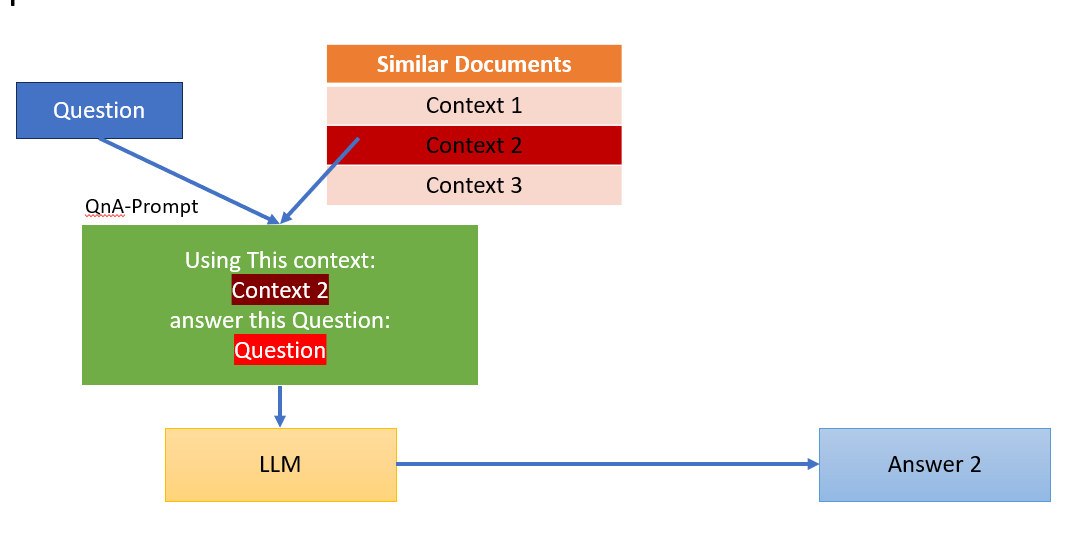

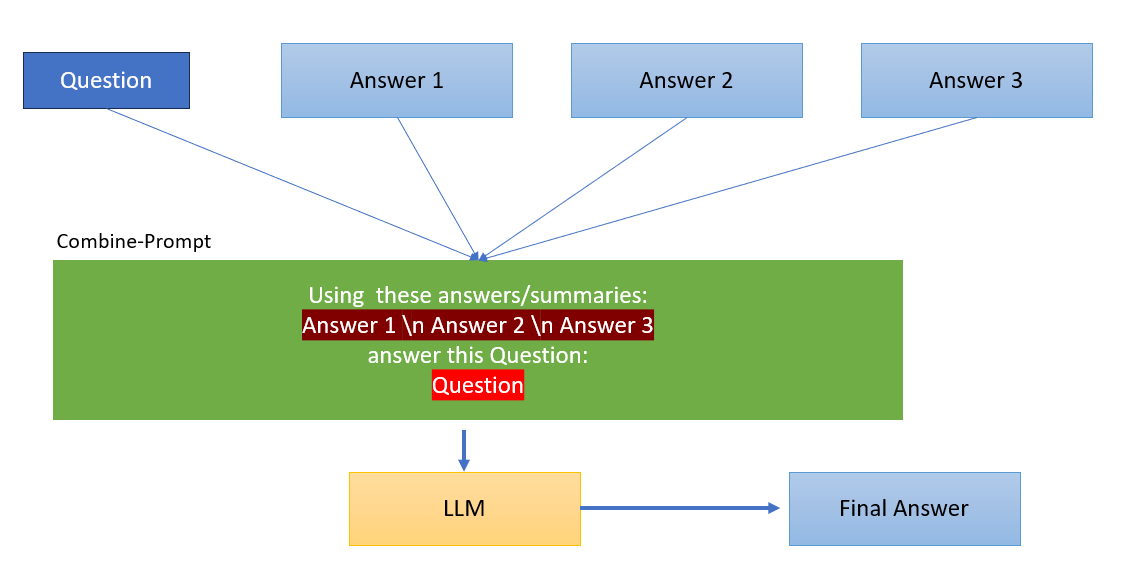

In [188]:
from langchain.chains.question_answering import load_qa_chain

In [199]:
qna_template = "\n".join([
    "Answer the next question using the provided context.",
    "If the answer is not contained in the context, say 'NO ANSWER IS AVAILABLE'",
    "### Context:",
    "{context}",
    "",
    "### Question:",
    "{question}",
    "",
    "### Answer:",
])

qna_prompt = PromptTemplate(
    template=qna_template,
    input_variables=['context', 'question'],
)

In [201]:
combine_template = "\n".join([
    "Given intermediate contexts for a question, generate a final answer.",
    "If the answer is not contained in the intermediate contexts, say 'NO ANSWER IS AVAILABLE'",
    "### Summaries:",
    "{summaries}",
    "",
    "### Question:",
    "{question}",
    "",
    "### Final Answer:",
])

combine_prompt = PromptTemplate(
    template=combine_template,
    input_variables=['summaries', 'question'],
)

In [202]:
map_reduce_chain = load_qa_chain(model, chain_type="map_reduce",
                                 return_intermediate_steps=True,
                                 question_prompt=qna_prompt,
                                 combine_prompt=combine_prompt)

In [203]:
question = "What did Tesla invent?"

similar_docs = vector_db.similarity_search(question, k=5)

print( len(similar_docs) )

5


In [206]:
Answer = map_reduce_chain({
    "input_documents":similar_docs,
    "question":question
},
                 return_only_outputs= True)

In [207]:
Answer

{'intermediate_steps': ['NO ANSWER IS AVAILABLE',
  'Tesla invented an induction motor that ran on alternating current (AC).',
  'NO ANSWER IS AVAILABLE',
  'NO ANSWER IS AVAILABLE',
  'NO ANSWER IS AVAILABLE'],
 'output_text': 'Tesla invented an induction motor that ran on alternating current (AC).'}

# QnA Chain | Refine

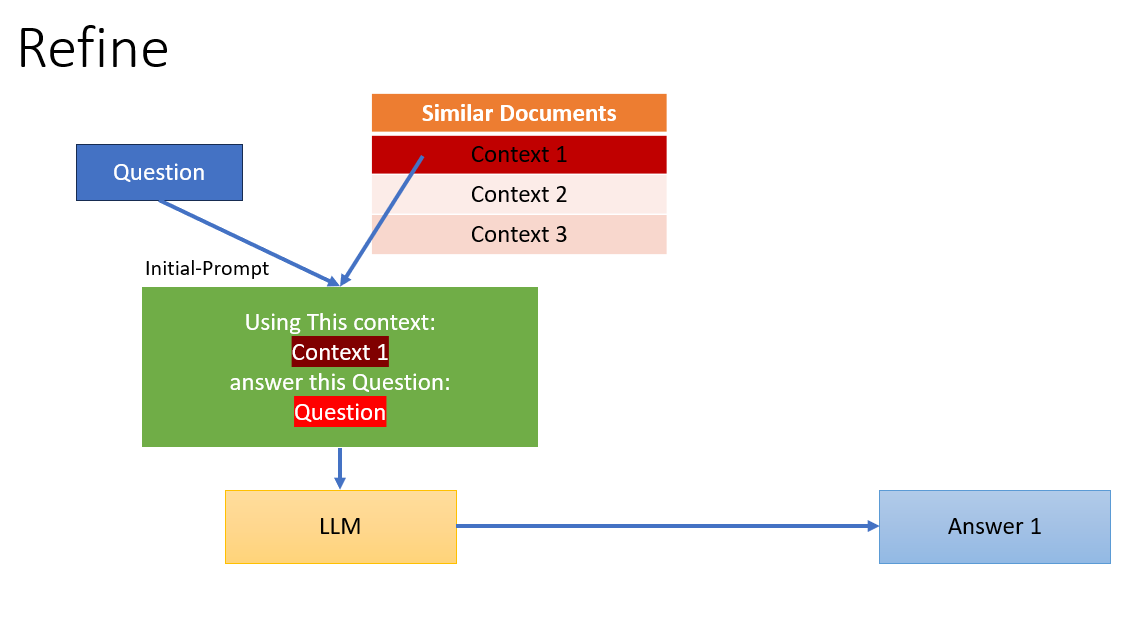

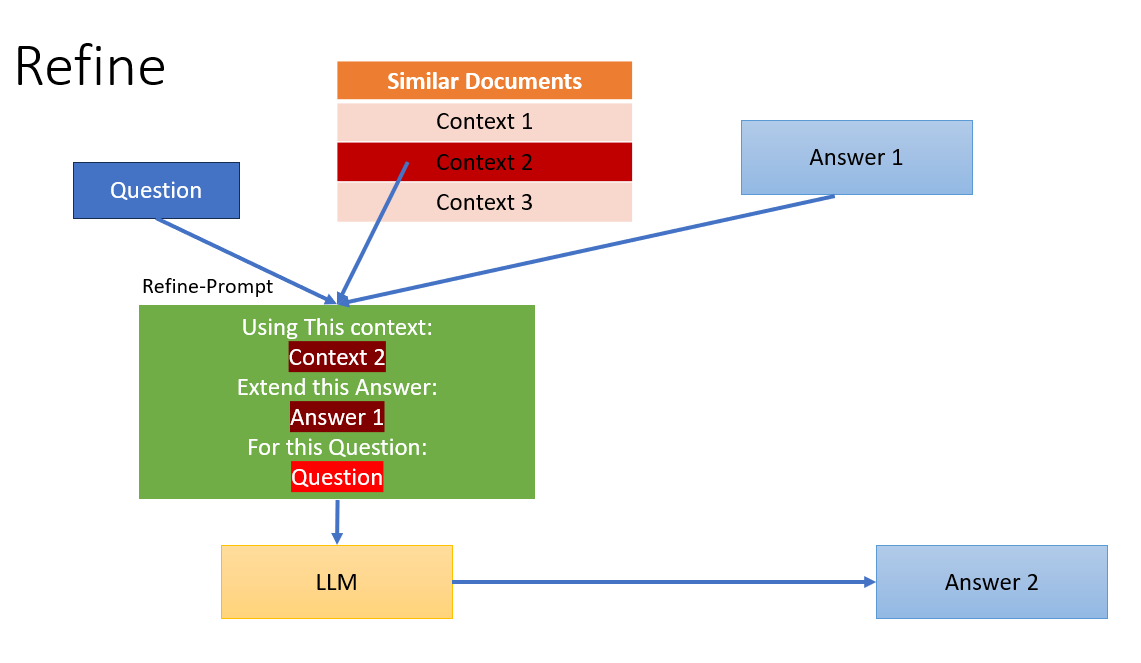

In [208]:
from langchain.chains.question_answering import load_qa_chain

In [209]:
initial_qna_template = "/n".join([
    "Answer the following question using the provided text only.",
     "If answer is not available. Say 'No answer for this context'",
     "### Context:",
     "{context_str}",
    "",
    "### Question:",
    "{question}",
    "### Answer:",
])

In [210]:
initial_qna_prompt = PromptTemplate(
    template = initial_qna_template,
    input_variables = ["context_str","question"]
)

In [211]:
refine_qna_template = "\n".join([
    "Refine the existing answer, if required, with the following context.",
    "If answer is not available. Say 'No answer for this context'",
     "### Context",
    "{context_str}",
    "",
    "### Existing Answer:",
    "{existing_answer}",
    "",
    "### Question:",
    "{question}",
    "",
    "### Refined Answer:",
])
refine_qna_prompt= PromptTemplate(
    template=refine_qna_template,
    input_variables=['context_str', 'existing_answer', 'question']
)

In [212]:
refine_chain = load_qa_chain(
    model,
    chain_type= "refine",
    question_prompt= initial_qna_prompt,
    refine_prompt= refine_qna_prompt,
    return_intermediate_steps = True)

In [215]:
final_refined_answer= refine_chain({
    "input_documents":similar_docs,
    "question":question
},
                 return_only_outputs= True)

In [218]:
final_refined_answer= refine_chain({
    "input_documents":similar_docs,
    "question":question
},
                 return_only_outputs= False)

In [221]:
final_refined_answer["output_text"]

'Based on the provided context, Tesla invented an improved DC generator, for which he obtained his first patents issued in the US. The context does not mention other inventions such as the induction motor, wirelessly controlled boat, mechanical oscillators/generators, electrical discharge tubes, or early X-ray imaging.'